Logistic regression - a classification algorithm used for binary classification 

$$ P(y = 1 | \textbf{x}) = \frac{1}{1+\exp{(-z)}}, $$
where 
$$ z = \textbf{w}^T\textbf{x} + w_0$$

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.special import expit  #sigmoid function

m1 = np.zeros(2)
m2 = np.ones(2)

s1 = np.identity(2)
s2 = s1

#multivariate normal distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
#N samples from each distribution

N = 5
np.random.seed(2000)
class1_samples = np.random.multivariate_normal(m1, s1, N)
class2_samples = np.random.multivariate_normal(m2, s2, N)

min = np.min([class1_samples, class2_samples])
max = np.max([class1_samples, class2_samples])

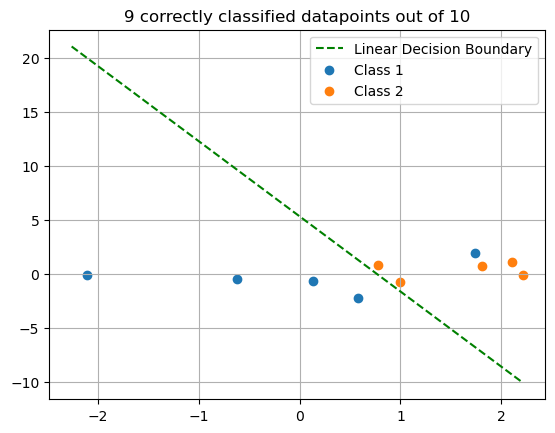

In [278]:
X = np.vstack((class1_samples, class2_samples))
y = np.array([0]*N + [1]*N)  #labels: 0 for class1, 1 for class2

#LDA ... linear discriminant analysis
lda = LDA()
lda.fit(X, y) #here, the magic happens

#Coefficients of the linear function
w = lda.coef_[0] # + [5, 8] #w1, w2 
w0 = lda.intercept_[0] #+ 15 #w0

#decision boundary  w@x + w0 = w1x1 + w2x2 + w0 = 0
#rewrite as y= ax + b, assuming x1 = x, x2 = y
# y = -1/w2(w1x1 + w0)

def linear_y(X, w0 = w0, w1=w[0], w2=w[1]):
    return (-w1 * X - w0) / w2 

correctly_clasified = np.sum(class1_samples[:, 1] < linear_y(class1_samples[:, 0])) + np.sum(class2_samples[:, 1] > linear_y(class2_samples[:, 0]))

x_values = np.linspace(min, max, 100)
y_values = linear_y(x_values)
#y_values = (-w[0] * x_values - w0) / w[1]
plt.plot(x_values, y_values, color='green', linestyle='--', label='Linear Decision Boundary')
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class 1')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class 2')
plt.title(f'{correctly_clasified} correctly classified datapoints out of {2*N}')

plt.grid()
plt.legend()



In [279]:
#add third dimension, output of the sigmoid function
sigmoid_values_class1 = expit(class1_samples@w + w0).reshape(-1, 1)
sigmoid_values_class2 = expit(class2_samples@w + w0).reshape(-1, 1)

class1_samples_3d = np.hstack([class1_samples, sigmoid_values_class1])
class2_samples_3d = np.hstack([class2_samples, sigmoid_values_class2])

correctly_clasified = np.sum(class1_samples_3d[:, 2] < 0.5) + np.sum(class2_samples_3d[:, 2] > 0.5)

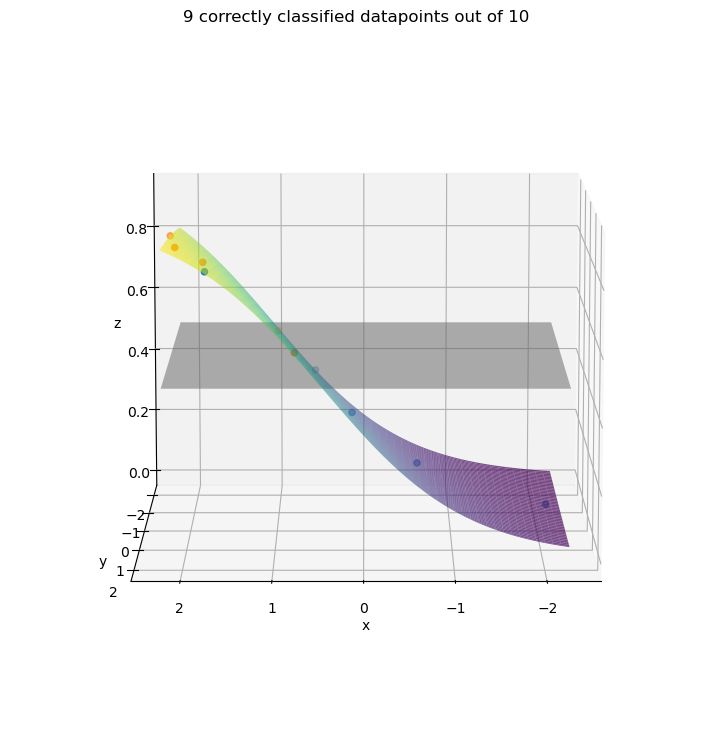

In [288]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(projection='3d')

ax.scatter(class1_samples_3d[:, 0], class1_samples_3d[:, 1], class1_samples_3d[:, 2], label = 'Class 1')
ax.scatter(class2_samples_3d[:, 0], class2_samples_3d[:, 1], class2_samples_3d[:, 2], label = 'Class 2')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

min = np.min([class1_samples_3d, class2_samples_3d])
max = np.max([class1_samples_3d, class2_samples_3d])
x = np.linspace(min, max, 100)
y = np.linspace(min, max, 100)
X, Y = np.meshgrid(x, y)

#plot a surface with a constant value z = 0.5
Z = np.full(X.shape, 0.5)
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='gray')

#plot the sigmoid surface
x1 = np.linspace(min, max, 100)
x2 = np.linspace(min, max, 100)
X1, X2 = np.meshgrid(x1, x2)

# z = w1*x1 + w2*x2 + w0 --> sigmoid(Z)
Z = w[0] * X1 + w[1] * X2 + w0
# Apply the sigmoid function to z
sigmoid_Z = expit(Z)
ax.plot_surface(X1, X2, sigmoid_Z, cmap='viridis', alpha=0.7)

#ax.view_init(elev=10, azim=125, roll=0)
ax.view_init(elev=10, azim=90, roll=0)
plt.title(f'{correctly_clasified} correctly classified datapoints out of {2*N}')
plt.show()